In [1]:
import numpy as np
import operator
from os import listdir

In [2]:
def createDataSet():
    #四组数据，每组数据含两个特征值
    group = np.array([
                    [1.1,1.1],
                    [1.0,1.0],
                    [0,0],
                    [0,0.1]
                    ])
    #group数据对应标签信息，大小与group行数相同
    labels = ['A','A','B','B']
    return group,labels

In [3]:
group,labels = createDataSet()

In [4]:
group

array([[1.1, 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [5]:
labels

['A', 'A', 'B', 'B']

\begin{equation}
distance=\sqrt{(x1-x2)^{2}+(y1-y2){^2}}
\end{equation}

In [6]:
'''
inX: 待预测的输入向量
dataSet: 样本训练集
labels: 标签向量
k: 最近邻居个数
'''
def classify0(inX, dataSet,labels,k):
    '''
    step1: 计算输入向量inX与所有样本点的欧式距离
    '''
    dataSetSize = dataSet.shape[0]
    #print(np.tile(inX,(dataSetSize,1)))
    #行向重复1次，列向重复dataSetSize次，扩展得到新矩阵与原矩阵相减
    diffMat = np.tile(inX,(dataSetSize,1)) - dataSet
    #print(diffMat)
    sqDiffMat = diffMat**2
    #print(sqDiffMat)
    #平方再求和，sum(axis=0)-->行相加，sum(1)-->列相加
    sqDistances = sqDiffMat.sum(axis=1)
    #print("sqDistances:", sqDistances)

    # 再开方，得到与样本集所有元素的欧式距离
    distances = sqDistances**0.5
    #print("distances:",distances)

    #distances保存测试向量与样本集所有元素欧式距离，返回排序后的索引值
    sortedDistIndicies = distances.argsort()
    #print("sortedDistIndicies:", sortedDistIndicies)

    
    '''
    step2:选择距离最小的k个点
    '''
    classCount={}
    for i in range(k):
        #按序取出前k个元素的类别
        voteIlabel = labels[sortedDistIndicies[i]]
        #dict.get(key,dafault=None)字典返回指定key的值，若不存在，创建一个新键值
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1

    '''
    step3:选出k个点里，出现频率最高的类别
    '''
    #print('classCount:',classCount)
    #classCount.items():将字典分解为元祖列表
    # key=operator.itemgetter(1)根据字典的值进行排序
    # key=operator.itemgetter(0)根据字典的键进行排序
    # reverse降序排序字典
    #print(classCount)
    #print(classCount.items())
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    #print('sortedClassCount:', sortedClassCount)
    
    #返回预测的类别
    return sortedClassCount[0][0]

In [7]:
classify0([0,0],group,labels,3)

'B'

In [8]:
def file2matrix(filename):
    '''
    step1: 得到文件行数
    '''
    fr = open(filename)
    arrayOfLines = fr.readlines() #读取所有内容
    #得到文件内容行数
    numberOFLines = len(arrayOfLines)

    '''
    step2: 创建返回的NumPy矩阵
    '''
    #分别是解析数据的矩阵和分类标签向量
    returnMat = np.zeros((numberOFLines, 3))
    # print('numberOFLines:', numberOFLines)
    classLabelVector = []

    '''
    step3: 解析文件内容到列表
    '''
    index = 0
    for line in arrayOfLines:
        line = line.strip() #参数为空时，默认删除空白符('\n','\t','\r',' ')
        #对字符串line根据'\t'进行切片
        listFromLine = line.split('\t')
        #print(listFromLine)
        #提取前n-1列，存放到returnMat特征矩阵中
        returnMat[index, :] = listFromLine[0:-1]

        classLabelVector.append(int(listFromLine[-1]))
        index += 1

    return returnMat,classLabelVector

In [9]:
def autoNorm(dataSet):
    #获取数据集每列的最小，最大值
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    #获取每列的数据值范围
    diffs = maxVals - minVals
    #print(diffs)

    #创建返回的归一化数据矩阵
    normDataSet = np.zeros(np.shape(dataSet))
    #print(minVals)
    #print(normDataSet.shape)
    #获取dataSet的行数
    m = dataSet.shape[0]

    #原始值减去最小值
    normDataSet = dataSet - np.tile(minVals,(m,1)) #将一行多列向量minVals，扩展成m行多列矩阵
    #再除以最大/最小值差，得到归一化数据
    normDataSet = normDataSet/np.tile(diffs,(m,1))

    #返回归一化数据矩阵，数据范围，最小值
    return normDataSet,diffs,minVals

In [10]:
datingDateMat,datingLabels=file2matrix('./datingTestSet2.txt')

In [11]:
normDataSet,diffs,minVals = autoNorm(datingDateMat)
#print(normDataSet,diffs,minVals)

使用Matplotlib创建散点图

In [12]:
import matplotlib.lines as lines
import matplotlib.pyplot as plt

In [13]:
def show_data2(datingDataMat,datingLabels):
    fig, axs = plt.subplots(2,2,figsize=(12,9))
    numberOflabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('blue')
        if i == 3:
            LabelsColors.append('red')
            
    axs[0][0].scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*np.array(datingLabels),color=LabelsColors)
    axs[0][0].set_xlabel('miles of fight')
    axs[0][0].set_ylabel('video time percent')
    axs[0][0].set_title('flight miles and video percent',fontsize=20,weight='bold',color='red')

    axs[0][1].scatter(datingDataMat[:,0],datingDataMat[:,2],15.0*np.array(datingLabels),color=LabelsColors)
    axs[0][1].set_xlabel('miles of fight')
    axs[0][1].set_ylabel('ice cream')
    axs[0][1].set_title('flight miles and ice cream',fontsize=20,weight='bold',color='b')

    axs[1][0].scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*np.array(datingLabels),color=LabelsColors)
    axs[1][0].set_xlabel('video time percent')
    axs[1][0].set_ylabel('ice cream')

    dislike = lines.Line2D([], [], color='black', marker='.',markersize=6, label='dislike')
    ordinary = lines.Line2D([], [], color='blue', marker='.',markersize=6, label='ordinary')
    fascination = lines.Line2D([], [], color='red', marker='.',markersize=6, label='fascination')

    axs[0][0].legend(handles=[dislike,ordinary,fascination],edgecolor='y')
    axs[0][1].legend(handles=[dislike,ordinary,fascination])
    axs[1][0].legend(handles=[dislike,ordinary,fascination])

    plt.show()

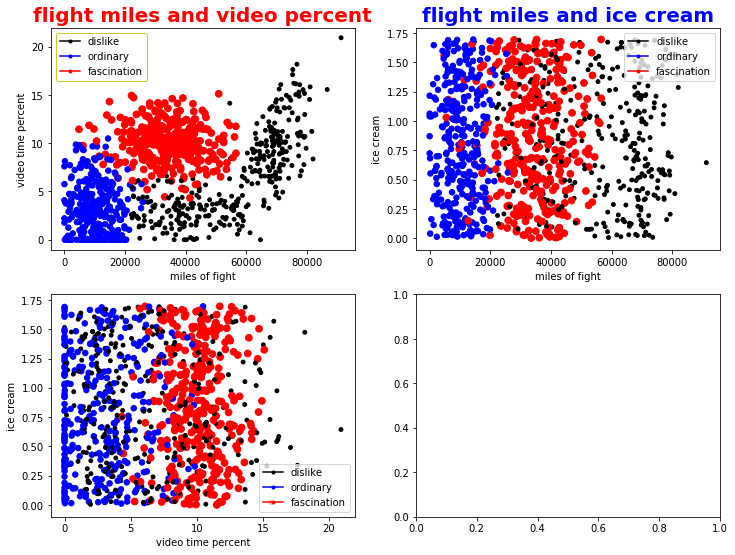

In [14]:
show_data2(datingDateMat,datingLabels)

In [15]:
normMat,diffs,minVals = autoNorm(datingDateMat)

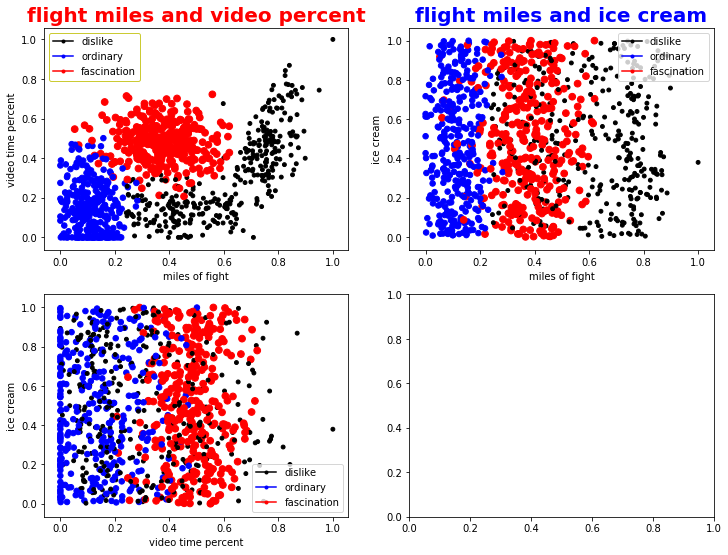

In [16]:
show_data2(normMat,datingLabels)

In [17]:
'''
func: 分类器测试
para: 无

Returns:
    nor

'''
def datingClassTest():
    hoRatio = 0.1
    filename = 'datingTestSet2.txt'
    #从文件获取特征矩阵和分类标签向量
    datingDataMat,datingLabels = file2matrix(filename)
    #对数据做归一化，返回归一化特征矩阵，数据范围，数据最小值
    normMat,ranges,minVals = autoNorm(datingDataMat)

    #获取特征矩阵行数
    m = normMat.shape[0]
    #测试数据的个数
    numTestVecs = int(m*hoRatio)
    #分类错误级数
    errorCount =0.0

    for i in range(numTestVecs):
        #0~numTestVecs:测试集，numTestVecs~m:数据集
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        #print('the classifier cam back with:%d, the real answer is:%d'%(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]):
            errorCount += 1.0
    print('the total error rate is:{}'.format(errorCount/float(numTestVecs)))

In [18]:
datingClassTest()

the total error rate is:0.05


In [19]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("video time percent:"))
    ffMiles = float(input("flight miles:"))
    iceCream = float(input("iceCreamPerWeek:"))

    #从文件读取数据集到矩阵，并且做归一化
    filename = 'datingTestSet2.txt'
    datingDataMat, datingLabels = file2matrix(filename)
    normMat,ranges,minVals = autoNorm(datingDataMat)

    #生测测试集向量(1×3矩阵)
    inArr = np.array([ffMiles,percentTats,iceCream])

    print(inArr)
    print('*'*88)
    print(minVals)
    print(ranges)
    norm_inArr =(inArr-minVals)/ranges
    print('*' * 88)
    print("归一化后:",norm_inArr)
    classifierResult = classify0(norm_inArr,normMat,datingLabels,3)
    print('test ret:',classifierResult)
    print("this gun,u {}".format(resultList[classifierResult-1]))

In [20]:

classifyPerson()

video time percent:5
flight miles:100
iceCreamPerWeek:0.6
[100.    5.    0.6]
****************************************************************************************
[0.       0.       0.001156]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
****************************************************************************************
归一化后: [0.00109561 0.23901317 0.35343354]
test ret: 2
this gun,u in small doses


# 手写体识别;
## 收集数据：
trainingDigits目录有约2000个实例，每个实例都是32x32像素的图像，每个字节表示一个点1/0如下图所示
<img src="img/digit.png">
每个数字大概200个样本,testDigits是约900个测试数据


# 准备数据
为了使用分类器,必须将图像格式转化为分类器使用的向量,这里将32x32的二进制图像矩阵转化为1x1024的向量表示一幅数字图


In [21]:
def img2vector(filename):
    returnVect = np.zeros((1, 1024))  #构造一个1x1024的零向量
    fr = open(filename)
    for i in range(32):
        linrStr = fr.readline()
        for j in range(32):
            returnVect[0, 32 * i + j] = int(linrStr[j])

    return returnVect

In [22]:
testVector = img2vector('handwriting_digits/testDigits/0_13.txt')

In [23]:
print(testVector[0,0:31])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [24]:
print(testVector[0,32:63])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


## 测试算法


In [25]:
from os import listdir

In [26]:
def handwritingClassTest():
    hwLabels = []
    #获取目录内容
    dirName = './handwriting_digits/trainingDigits/'
    trainingFileList = listdir(dirName)
    #print(trainingFileList)
    m = len(trainingFileList)
    trainingMat = np.zeros((m,1024))
    
    #step1: 将2000个样本,特征值读入矩阵trainingMat, 对应标签存入hwLabels[]
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector(dirName+'/'+fileNameStr)
    
    dirName = 'handwriting_digits/testDigits'
    testFileList = listdir(dirName)
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector(dirName+'/'+fileNameStr)
        classifierResult = classify0(vectorUnderTest,trainingMat,hwLabels,3) 
        #print('the classifier came back with:%d,the real answer is:%d'%(classifierResult,classNumStr))
        if (classifierResult != classNumStr):
            errorCount += 1.0

    print('\nthe total number of errors is:%d'%errorCount)
    print('\nthe total error rate is:%f'%(errorCount/float(mTest)))
    


In [27]:
import sys
from datetime import datetime

In [29]:
start = datetime.now()
handwritingClassTest()
delta = datetime.now() - start
print("handwritingClassTest Elapsed time in microsecond",delta.microseconds)


the total number of errors is:10

the total error rate is:0.010571
handwritingClassTest Elapsed time in microsecond 511000


# kNN识别手写体数据集小结：
1.错误率约1%;

2.实际使用这个算法时,效率并不高.因为每测试一个图都要做2000次距离计算,每个距离计算包括1024个维度,测试900次.I5上执行约48S，

3.K近邻法必须保存全部数据集，如果训练数据很大，必须，耗费大量存储空间；
ps:是否可以改进算法，减少存储空间和时间开销？k决策树就是k-近邻算法的优化版

3.k-近邻法的一个缺陷，它无法给出任何数据的基础结构信息，因此我们无法知晓平均样本和典型实例样本具有什么特征。
使用概率测量方法处理分类问题，可以解决该问题；